# Analyze the results from the test retrival

This script has the purpose to analyze and present the results that came out of the expirements that have been done

In [1]:
import pandas as pd
import seaborn as sns

## Load data

In [2]:
df = pd.read_csv('results_test_retrival.csv')
df.head()

,Total files in vectorStore,Total files checked with questions,Total files found with questions,Percentage found questions,Average precision questions,ingestionMode,addedMetaDataURLCSV,addContext,embeddings_model,text_splitter_method,embeddings_provider,database,concatFiles
0,1161,52,6,11.538462,0.115385,IngestionMode.question_answer,docs/metadata.csv,False,GroNLP/bert-base-dutch-cased,NLTKTextSplitter,local_embeddings,chromadb,True
1,1161,52,6,11.538462,0.115385,IngestionMode.question_answer,docs/metadata.csv,False,GroNLP/bert-base-dutch-cased,NLTKTextSplitter,local_embeddings,chromadb,True
2,1161,52,6,11.538462,0.115385,IngestionMode.question_answer,docs/metadata.csv,False,GroNLP/bert-base-dutch-cased,NLTKTextSplitter,local_embeddings,chromadb,True
3,1161,52,6,11.538462,0.115385,IngestionMode.question_answer,docs/metadata.csv,False,GroNLP/bert-base-dutch-cased,NLTKTextSplitter,local_embeddings,chromadb,True
4,1161,52,6,11.538462,0.115385,IngestionMode.question_answer,docs/metadata.csv,False,GroNLP/bert-base-dutch-cased,NLTKTextSplitter,local_embeddings,chromadb,True


In [3]:
filtered_df = df.groupby([
    'embeddings_model', 
    'text_splitter_method', 
    'embeddings_provider', 
    'database', 
    'concatFiles', 
    'addContext', 
    'addedMetaDataURLCSV', 
    'ingestionMode'
])

## Calculate the MEAN

In [4]:
filtered_df = df.groupby([
  'embeddings_model', 
  'text_splitter_method', 
  'embeddings_provider', 
  'database', 
  'concatFiles', 
  'addContext', 
  'addedMetaDataURLCSV', 
  'ingestionMode'
]).agg({
    'Total files found with questions': 'mean',
    'Percentage found questions': 'mean'
}).reset_index()

In [5]:
df.columns

Index(['Total files in vectorStore', 'Total files checked with questions',
       'Total files found with questions', 'Percentage found questions',
       'Average precision questions', 'ingestionMode', 'addedMetaDataURLCSV',
       'addContext', 'embeddings_model', 'text_splitter_method',
       'embeddings_provider', 'database', 'concatFiles'],
      dtype='object')

In [6]:
filtered_df.columns

Index(['embeddings_model', 'text_splitter_method', 'embeddings_provider',
       'database', 'concatFiles', 'addContext', 'addedMetaDataURLCSV',
       'ingestionMode', 'Total files found with questions',
       'Percentage found questions'],
      dtype='object')

/var/folders/bp/b_f_g9ns76j9bx59n8kjzr740000gn/T/ipykernel_50160/3602374488.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(embedding_model_mapping))  # Get distinct colors for each embedding model
/var/folders/bp/b_f_g9ns76j9bx59n8kjzr740000gn/T/ipykernel_50160/3602374488.py:48: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


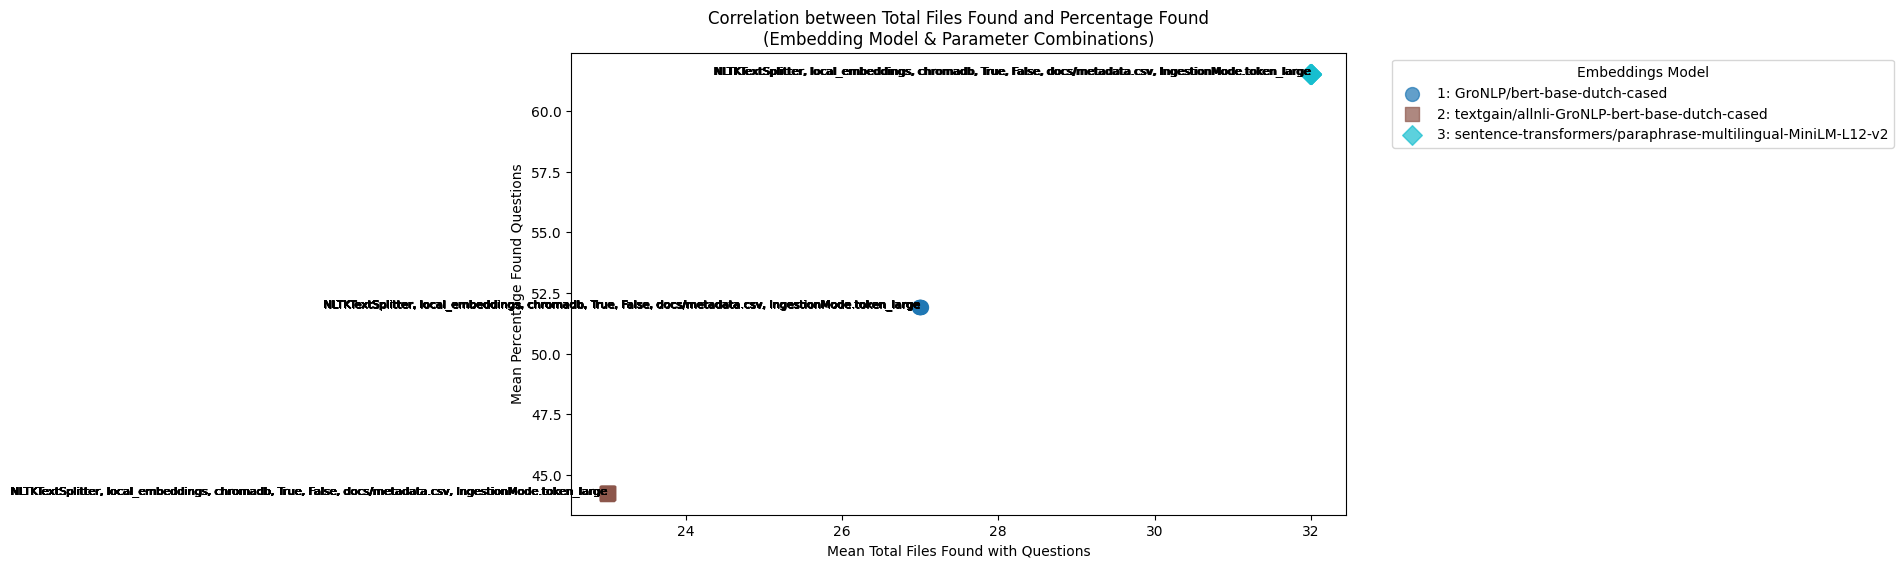

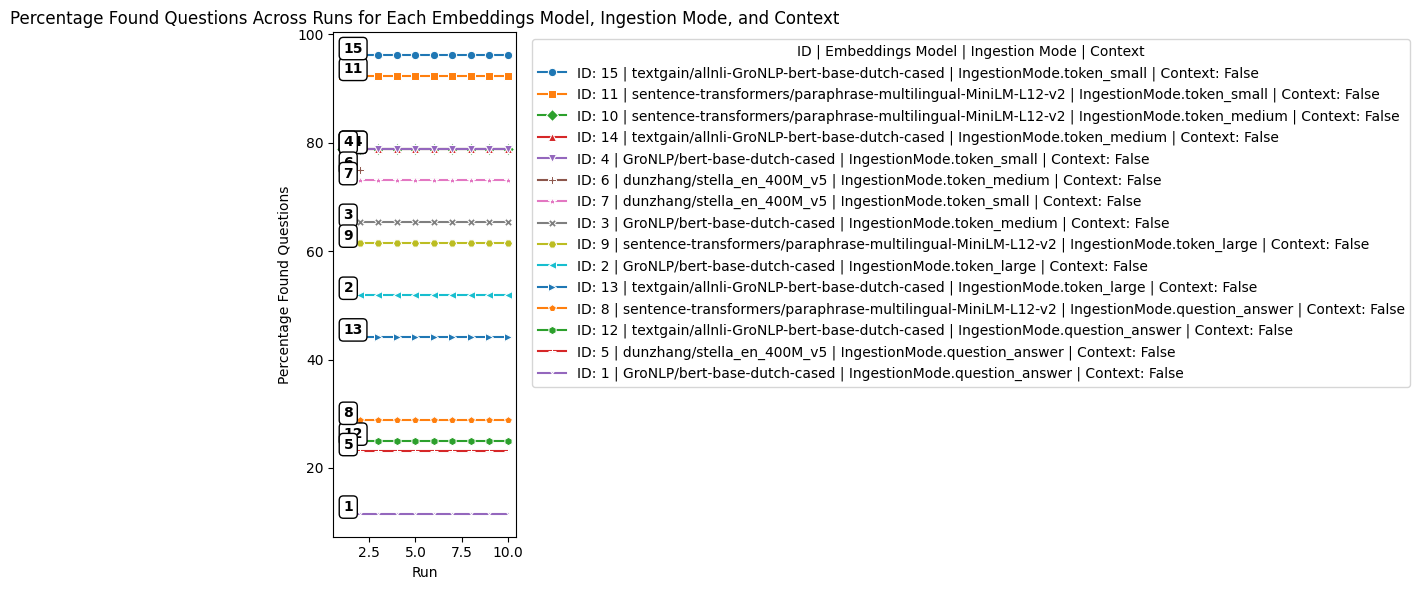

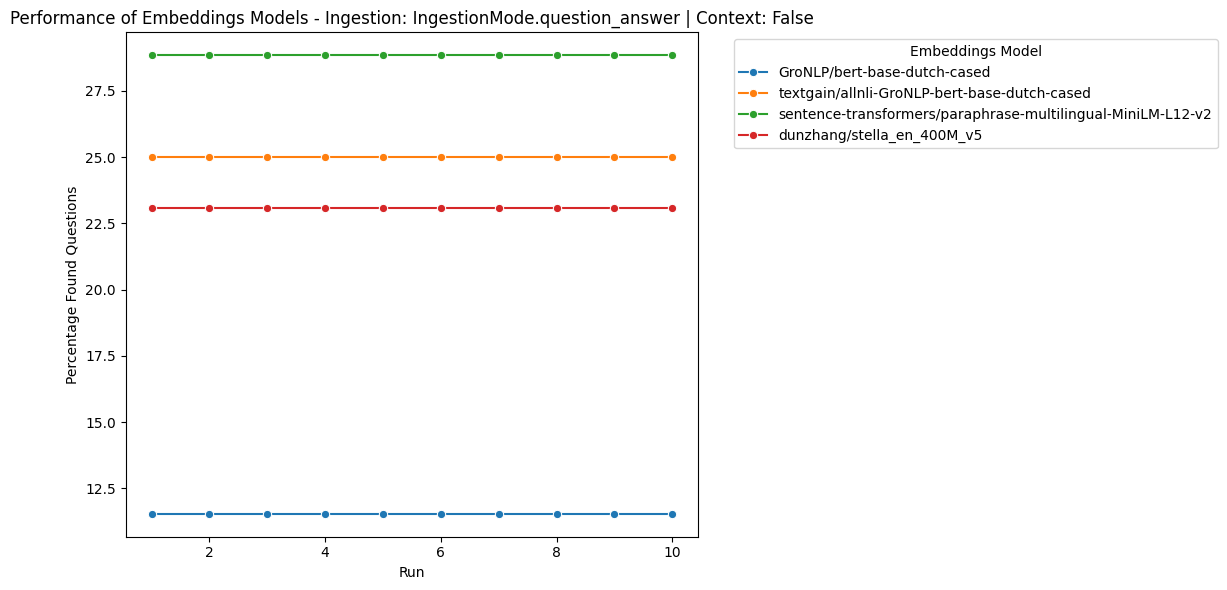

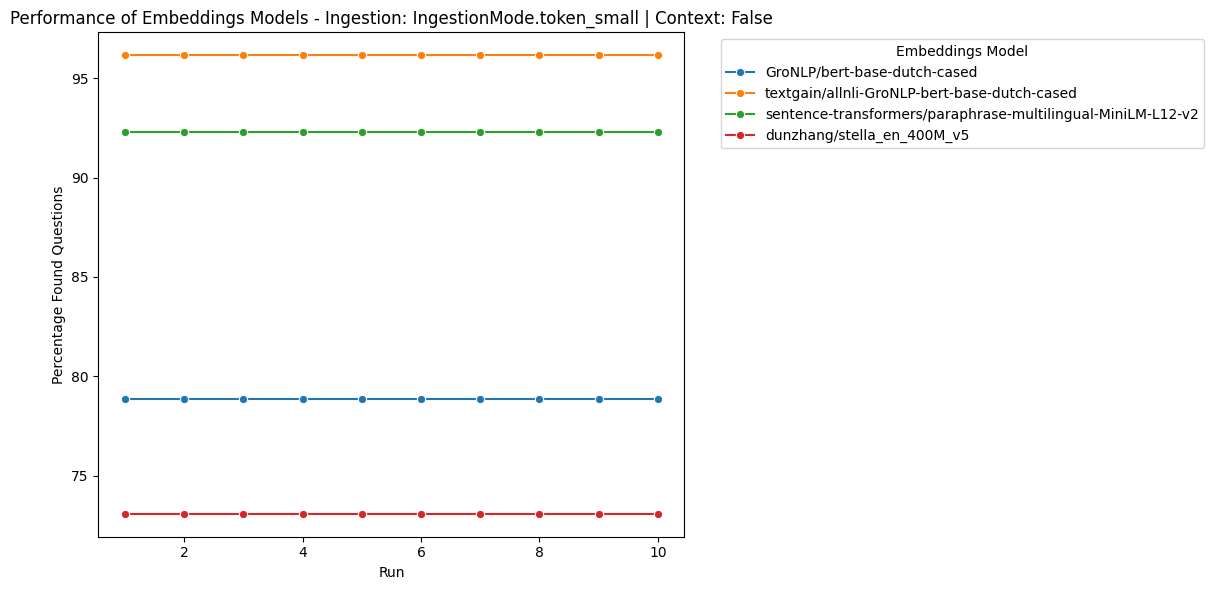

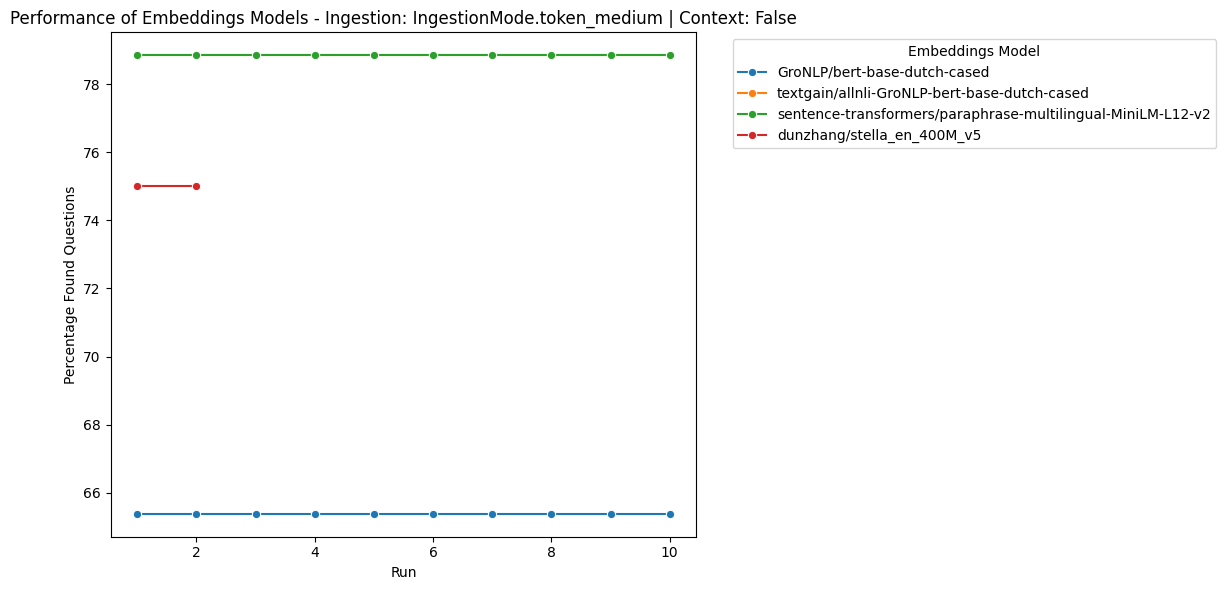

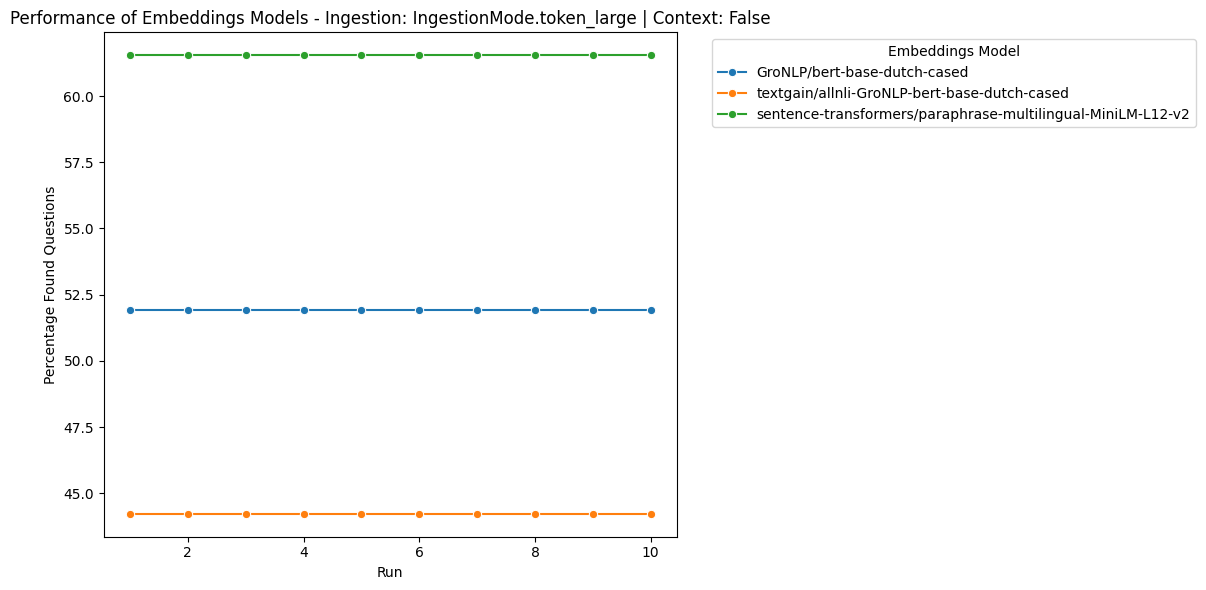

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create mappings for embeddings_model and combinations of other parameters
embedding_model_mapping = {model: str(i + 1) for i, model in enumerate(filtered_df['embeddings_model'].unique())}

# Combine other parameters into tuples for text annotations
other_params = filtered_df[['text_splitter_method', 'embeddings_provider', 'database', 'concatFiles', 'addContext', 'addedMetaDataURLCSV', 'ingestionMode']].apply(lambda row: ', '.join(row.astype(str)), axis=1)

# Step 2: Prepare for plotting
plt.figure(figsize=(10, 6))

# Colors and markers to differentiate embedding models
colors = plt.cm.get_cmap('tab10', len(embedding_model_mapping))  # Get distinct colors for each embedding model
markers = ['o', 's', 'D', '^', 'v', 'P', '*', 'X', 'H']  # Different marker styles

# Step 3: Plot each embedding model group with different markers and some transparency
for i, model in enumerate(embedding_model_mapping):
    # Filter data for this embedding model
    model_data = filtered_df[filtered_df['embeddings_model'] == model]
    
    # Apply jitter to avoid overlap
    x_jittered = model_data['Total files found with questions'] + np.random.uniform(-0.01, 0.01, size=len(model_data))
    y_jittered = model_data['Percentage found questions'] + np.random.uniform(-0.01, 0.01, size=len(model_data))
    
    # Plot for this embedding model with different markers and transparency (alpha=0.7)
    plt.scatter(x_jittered, y_jittered, color=colors(i), marker=markers[i % len(markers)], alpha=0.7, s=100, label=f"{embedding_model_mapping[model]}: {model}")
    
    # Add the text labels for the actual parameter combinations
    for j in range(len(model_data)):
        plt.text(
            x_jittered.iloc[j], 
            y_jittered.iloc[j], 
            other_params[model_data.index[j]],  # Direct text annotation of parameter combinations
            fontsize=8, 
            ha='right'
        )

# Step 4: Add plot labels and title
plt.xlabel('Mean Total Files Found with Questions')
plt.ylabel('Mean Percentage Found Questions')
plt.title('Correlation between Total Files Found and Percentage Found\n(Embedding Model & Parameter Combinations)')

# Step 5: Add the legend for Embedding Models
plt.legend(title="Embeddings Model", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Step 1: Create a 'Run' column to track each run (assumed each embedding model has 10 runs)
df['Run'] = df.groupby(['embeddings_model', 'ingestionMode', 'addContext']).cumcount() + 1

# Step 2: Assign a unique number to each combination of embeddings_model, ingestionMode, and addContext
df['unique_number'] = df.groupby(['embeddings_model', 'ingestionMode', 'addContext']).ngroup() + 1

# Step 3: Create a combined label for each unique combination including the unique number (ID)
df['label'] = 'ID: ' + df['unique_number'].astype(str) + ' | ' + df['embeddings_model'] + ' | ' + df['ingestionMode'] + ' | Context: ' + df['addContext'].astype(str)

# Step 4: Calculate the maximum Percentage found questions for each combination
df_max = df.groupby('label')['Percentage found questions'].max().reset_index()

# Step 5: Sort by the highest Percentage found questions in descending order
df_max = df_max.sort_values(by='Percentage found questions', ascending=False)

# Define markers to be used for each combination
markers = ['o', 's', 'D', '^', 'v', 'P', '*', 'X', 'H', '<', '>', 'p', 'h', '+', 'x']  # Add more markers if needed

# Step 6: Plot the line chart with unique markers for each combination, sorted by highest to lowest score
plt.figure(figsize=(12, 6))

# Loop over sorted labels and plot the lines
for i, label in enumerate(df_max['label']):
    group_data = df[df['label'] == label]
    sns.lineplot(x='Run', y='Percentage found questions', data=group_data, marker=markers[i % len(markers)], label=label)

# Step 7: Add labels, title, and legend
plt.xlabel('Run')
plt.ylabel('Percentage Found Questions')
plt.title('Percentage Found Questions Across Runs for Each Embeddings Model, Ingestion Mode, and Context')

# Step 8: Annotate the first node with the unique number, using an offset to prevent overlap
for label, group_data in df.groupby('label'):
    first_point = group_data[group_data['Run'] == 1].iloc[0]
    plt.text(
        first_point['Run'] + 0.1,  # Slightly offset x position
        first_point['Percentage found questions'] + 0.5,  # Slightly offset y position
        str(first_point['unique_number']),
        fontsize=10, fontweight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')  # Add a bounding box for clarity
    )

# Show the legend with the updated label (including ID), now sorted by score
plt.legend(title='ID | Embeddings Model | Ingestion Mode | Context', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()




# Step 1: Create a 'Run' column to track each run (assumed each embedding model has 10 runs)
df['Run'] = df.groupby(['embeddings_model', 'ingestionMode', 'addContext']).cumcount() + 1

# Step 2: Loop over unique combinations of ingestionMode and addContext
for ingestion_mode in df['ingestionMode'].unique():
    for context_mode in df['addContext'].unique():
        # Filter the data for the current combination of ingestionMode and addContext
        filtered_df = df[(df['ingestionMode'] == ingestion_mode) & (df['addContext'] == context_mode)]
        
        if not filtered_df.empty:
            # Step 3: Plot the line chart for each combination
            plt.figure(figsize=(12, 6))

            # Use seaborn lineplot to plot each embeddings_model as a different line
            sns.lineplot(x='Run', y='Percentage found questions', hue='embeddings_model', data=filtered_df, marker='o', palette='tab10')

            # Step 4: Add labels, title, and legend
            plt.xlabel('Run')
            plt.ylabel('Percentage Found Questions')
            title = f'Performance of Embeddings Models - Ingestion: {ingestion_mode} | Context: {context_mode}'
            plt.title(title)

            # Show the legend
            plt.legend(title='Embeddings Model', bbox_to_anchor=(1.05, 1), loc='upper left')

            # Display the plot
            plt.tight_layout()
            plt.show()
